In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import numpy as np 
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes

In [2]:
data = pd.read_csv("df_par_id.csv")

In [3]:
data.columns

Index(['Unnamed: 0', 'customer_unique_id', 'freight_value', 'review_score',
       'score_freq', 'price_y', 'score_rec', 'score_montant', 'score_rfm',
       'customer_city', 'order_id', 'product_id', 'seller_id',
       'categorie_regroupee'],
      dtype='object')

In [4]:
data = data[[ 'customer_unique_id', 'freight_value', 'review_score',
       'score_freq',  'score_rec', 'score_montant',
       'customer_city', 
       'categorie_regroupee']]

In [5]:
data.dtypes

customer_unique_id      object
freight_value          float64
review_score           float64
score_freq             float64
score_rec              float64
score_montant          float64
customer_city           object
categorie_regroupee     object
dtype: object

In [6]:
data = data.dropna()

In [7]:
missing_values = data.isnull().sum()
print(missing_values)


customer_unique_id     0
freight_value          0
review_score           0
score_freq             0
score_rec              0
score_montant          0
customer_city          0
categorie_regroupee    0
dtype: int64


### K prototypes

In [8]:

import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes

# sélectionner les colonnes numériques et catégorielles
numeric_cols = [col for col in data.columns if data[col].dtype in [np.float64, np.int64]]
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']

# séparer les colonnes numériques et catégorielles dans deux dataframes distincts
numeric_data = data[numeric_cols]
categorical_data = data[categorical_cols]




# standardiser les colonnes numériques
numeric_data = (numeric_data - numeric_data.mean()) / numeric_data.std()

# combiner les deux dataframes (numériques et catégorielles)
data_combined = pd.concat([numeric_data, categorical_data], axis=1)

# initialiser l'algorithme K-Prototypes avec les paramètres nécessaires


In [9]:
kproto = KPrototypes(n_clusters=5, init='Huang',n_jobs = -1 , max_iter = 20, n_init=2, verbose=2,random_state=42)

 # entraîner le modèle sur les données combinées
clusters = kproto.fit_predict(data_combined, categorical=list(range(len(numeric_cols), data_combined.shape[1])))

# afficher les résultats
print("Cluster labels:", clusters) 

Init: initializing centroids
Init: initializing centroids
Init: initializing clusters
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Starting iterations...
Run: 1, iteration: 1/20, moves: 15428, ncost: 393038.70809577574
Run: 2, iteration: 1/20, moves: 29311, ncost: 402613.2991751372
Run: 1, iteration: 2/20, moves: 2493, ncost: 392501.7876586372
Run: 2, iteration: 2/20, moves: 16296, ncost: 379892.56394408154
Run: 1, iteration: 3/20, moves: 781, ncost: 392474.94222515647
Run: 2, iteration: 3/20, moves: 9166, ncost: 373021.3522145337
Run: 1, iteration: 4/20, moves: 182, ncost: 392470.7182048085
Run: 2, iteration: 4/20, moves: 5585, ncost: 371280.8769885199
Run: 1, iteration: 5/20, moves: 154, ncost: 392460.988564743
Run: 2, iteration: 5/20, moves: 1232, ncost: 371217.04819111293
Run: 1, iteration: 6/20, moves: 274, ncost: 392439.8825255658
Run: 2, iteration: 6/20, moves:

In [10]:
data_combined

,freight_value,review_score,score_freq,score_rec,score_montant,customer_unique_id,customer_city,categorie_regroupee
0,-0.519895,0.676686,-0.056261,0.711385,0.716408,0000366f3b9a7992bf8c76cfdf3221e2,cajamar,Mobilier
1,-0.754467,-0.077031,-0.056261,0.711385,-1.387374,0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,Beauté et Santé
2,-0.189850,-0.830748,-0.056261,-1.409269,-0.686113,0000f46a3911fa3c0805444483337064,sao jose,Livre et Papeterie
3,-0.163927,-0.077031,-0.056261,-0.702384,-1.387374,0000f6ccb0745a6a4b88665a16c9f078,belem,Technologie
4,-0.210715,0.676686,-0.056261,-0.702384,1.417668,0004aac84e0df4da2b147fca70cf8255,sorocaba,Technologie
...,...,...,...,...,...,...,...,...
94716,14.446570,0.676686,-0.056261,-1.409269,1.417668,fffcf5a5ff07b0908bd4e2dbc735a684,sanharo,Beauté et Santé
94717,-0.033679,-0.077031,-0.056261,0.004500,-0.686113,fffea47cd6d3cc0a88bd621562a9d061,feira de santana,Alimentation
94718,0.147783,0.676686,-0.056261,-1.409269,0.015147,ffff371b4d645b6ecea244b27531430a,sinop,Bricolage et Jardin
94719,-0.096906,0.676686,-0.056261,0.711385,0.716408,ffff5962728ec6157033ef9805bacc48,bom jesus do norte,Mode


In [11]:
clusters

array([3, 2, 2, ..., 0, 3, 2], dtype=uint16)

In [12]:
data_combined["cluster"] = clusters

In [13]:
data_combined

,freight_value,review_score,score_freq,score_rec,score_montant,customer_unique_id,customer_city,categorie_regroupee,cluster
0,-0.519895,0.676686,-0.056261,0.711385,0.716408,0000366f3b9a7992bf8c76cfdf3221e2,cajamar,Mobilier,3
1,-0.754467,-0.077031,-0.056261,0.711385,-1.387374,0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,Beauté et Santé,2
2,-0.189850,-0.830748,-0.056261,-1.409269,-0.686113,0000f46a3911fa3c0805444483337064,sao jose,Livre et Papeterie,2
3,-0.163927,-0.077031,-0.056261,-0.702384,-1.387374,0000f6ccb0745a6a4b88665a16c9f078,belem,Technologie,2
4,-0.210715,0.676686,-0.056261,-0.702384,1.417668,0004aac84e0df4da2b147fca70cf8255,sorocaba,Technologie,0
...,...,...,...,...,...,...,...,...,...
94716,14.446570,0.676686,-0.056261,-1.409269,1.417668,fffcf5a5ff07b0908bd4e2dbc735a684,sanharo,Beauté et Santé,1
94717,-0.033679,-0.077031,-0.056261,0.004500,-0.686113,fffea47cd6d3cc0a88bd621562a9d061,feira de santana,Alimentation,2
94718,0.147783,0.676686,-0.056261,-1.409269,0.015147,ffff371b4d645b6ecea244b27531430a,sinop,Bricolage et Jardin,0
94719,-0.096906,0.676686,-0.056261,0.711385,0.716408,ffff5962728ec6157033ef9805bacc48,bom jesus do norte,Mode,3


In [14]:
numeric_data["cluster"] = clusters

In [15]:
data["cluster"] = clusters

In [16]:
from sklearn.manifold import TSNE

# create the t-SNE object with the desired parameters
tsne = TSNE()

# fit and transform the data
reduced_data = tsne.fit_transform(numeric_data)



In [17]:
numeric_data

,freight_value,review_score,score_freq,score_rec,score_montant,cluster
0,-0.519895,0.676686,-0.056261,0.711385,0.716408,3
1,-0.754467,-0.077031,-0.056261,0.711385,-1.387374,2
2,-0.189850,-0.830748,-0.056261,-1.409269,-0.686113,2
3,-0.163927,-0.077031,-0.056261,-0.702384,-1.387374,2
4,-0.210715,0.676686,-0.056261,-0.702384,1.417668,0
...,...,...,...,...,...,...
94716,14.446570,0.676686,-0.056261,-1.409269,1.417668,1
94717,-0.033679,-0.077031,-0.056261,0.004500,-0.686113,2
94718,0.147783,0.676686,-0.056261,-1.409269,0.015147,0
94719,-0.096906,0.676686,-0.056261,0.711385,0.716408,3


Text(0, 0.5, 't-SNE Dimension 2')

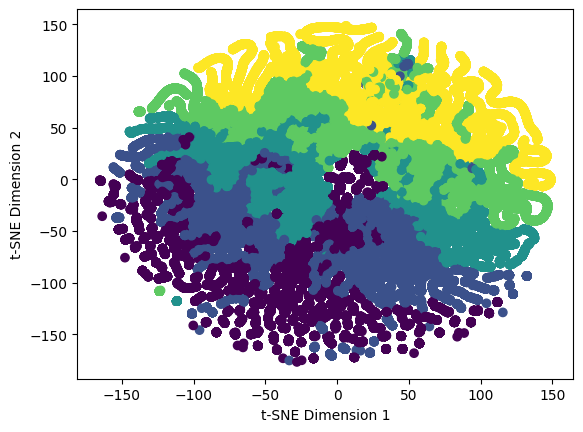

In [18]:
# plot the transformed data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=numeric_data["score_montant"])
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

Text(0, 0.5, 't-SNE Dimension 2')

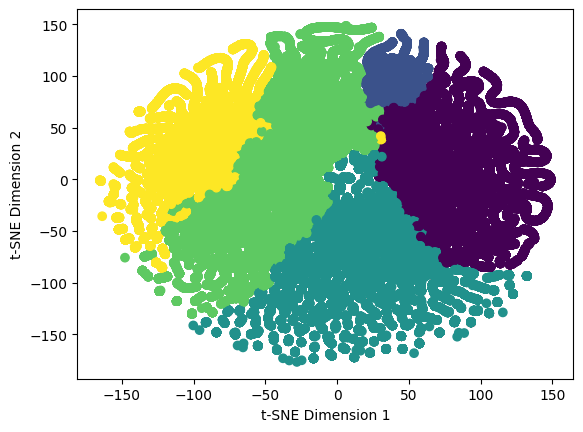

In [19]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=numeric_data["cluster"])
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

In [20]:
data.to_csv("df_cluster_test.csv")